# In this notebook:

## effects of class imbalance, undersampling, over-sampling

In [ ]:
import urllib.request

# Imports commonFunctions from github. 
## NOTE: THIS IS A SECURITY RISK IF YOU HAD TO DO THIS IN REAL LIFE
!pip install httpimport
import httpimport

path = 'https://raw.githubusercontent.com/Trotts/csc2034-ds-demos/master/CODE/'
with httpimport.remote_repo(['commonFunctions'], path):
    from commonFunctions import *

## generate another linearly separable dataset, but make it unbalanced

In [ ]:
X, CL = makeDataset(kind='classification', sameScale = False, balanced = False, unbalance = 0.9)

416  CL values flipped
class labels ratio: 0.10



visualise the entire dataset 

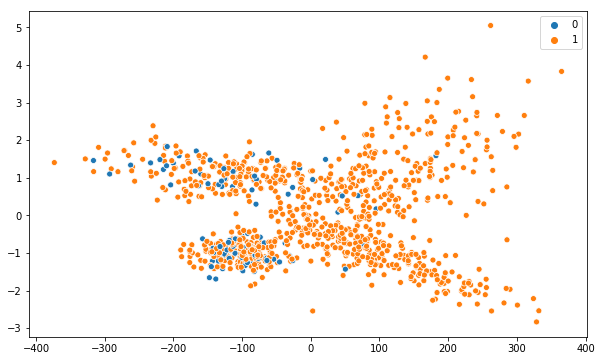

In [ ]:
# plot entire X,Y
plt.figure(figsize=(10,6))
sns.scatterplot(x=X[:,0], y=X[:,1], hue=CL)

## does the training set need rebalancing?

we can either:
- downsample the majority class to better match the cardinality of the minority class
- upsample the minority class
- apply different weights to the instances in the training set, if the classification algorithm allows it

### downsampling

In [ ]:
X_reb = X
CL_reb = CL

X_reb, CL_reb = downsample(X,CL) 

Counter(CL), Counter(CL_reb)

current class labels ratio: 0.10
X_reb length:  281
initially:  Counter({1: 905, 0: 95})
majority class: 1
threshold: 0.90
719 majority class records removed 
281 majority class records remaining
new class labels ratio: 0.51
counts:  Counter({1: 186, 0: 95})


(Counter({1: 905, 0: 95}), Counter({1: 186, 0: 95}))

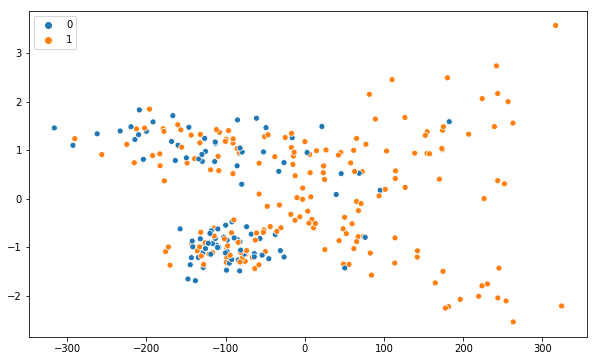

In [ ]:
# plot entire X,Y
plt.figure(figsize=(10,6))
sns.scatterplot(x=X_reb[:,0], y=X_reb[:,1], hue=CL_reb)

## alternative 2: oversampling the minority class

using Synthetic Minority Oversampling Technique (SMOTE):

N. V. Chawla, K. W. Bowyer, L. O.Hall, W. P. Kegelmeyer, “SMOTE: synthetic minority over-sampling technique,” Journal of artificial intelligence research, 16, 321-357, 2002.

see also [the imbalanced-learn library](https://imbalanced-learn.readthedocs.io/en/stable/over_sampling.html#cbhk2002)

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
X_reb = X
CL_reb = CL

X_reb, CL_reb = SMOTE().fit_resample(X, CL)

Counter(CL), Counter(CL_reb)

(Counter({1: 905, 0: 95}), Counter({1: 905, 0: 905}))

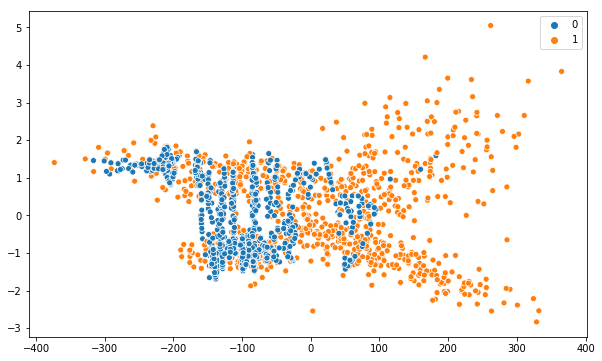

In [ ]:
# plot entire X,Y
plt.figure(figsize=(10,6))
sns.scatterplot(x=X_reb[:,0], y=X_reb[:,1], hue=CL_reb)

## split the dataset into train vs test

In [ ]:
XTrain, XTest, CLTrain, CLTest = train_test_split(X_reb, CL_reb, test_size = 0.33, random_state = 10)

## Logistic regression

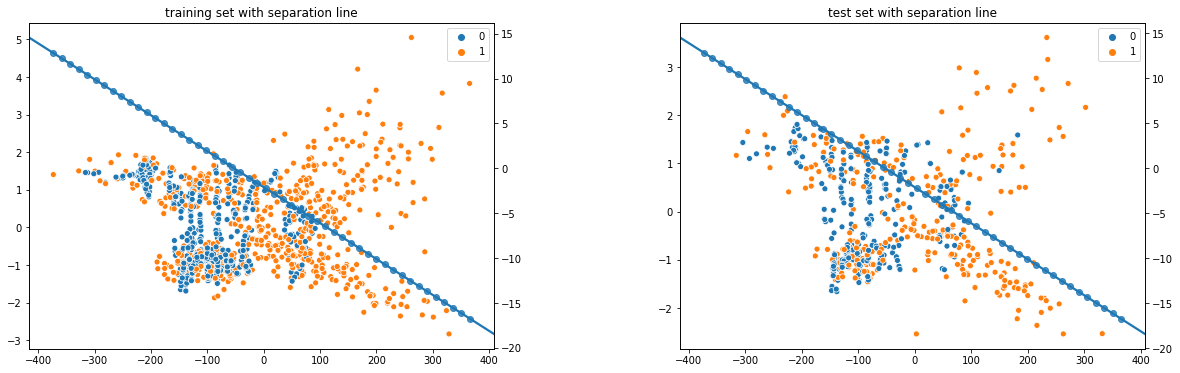

logit classification accuracy on training set: 0.72
logit classification accuracy on test set: 0.68
full classification report (on test set:)
              precision    recall  f1-score   support

           0       0.65      0.76      0.70       296
           1       0.72      0.60      0.65       302

    accuracy                           0.68       598
   macro avg       0.68      0.68      0.68       598
weighted avg       0.68      0.68      0.68       598

average precision score: 0.63
confusion matrix: 
 [[225  71]
 [121 181]]
tn: 225.00, fp: 71.000, fn: 121.00, tp: 181.00
using decision_function


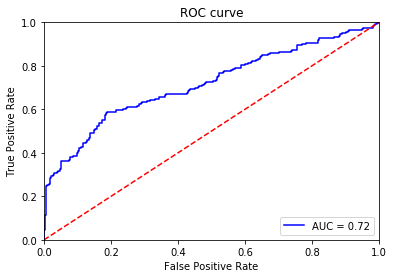

In [ ]:
clf, CL_pred_Train, CL_pred_Test = logit(XTrain, CLTrain, XTest, CLTest)

plotLinearFitTrainTest(clf, XTrain, CLTrain, XTest, CLTest)

evaluationReport(CLTrain, CL_pred_Train, CLTest, CL_pred_Test)

plotROC(clf, XTest, CLTest)

## SVM (linear)

/Users/npm65/miniconda3/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


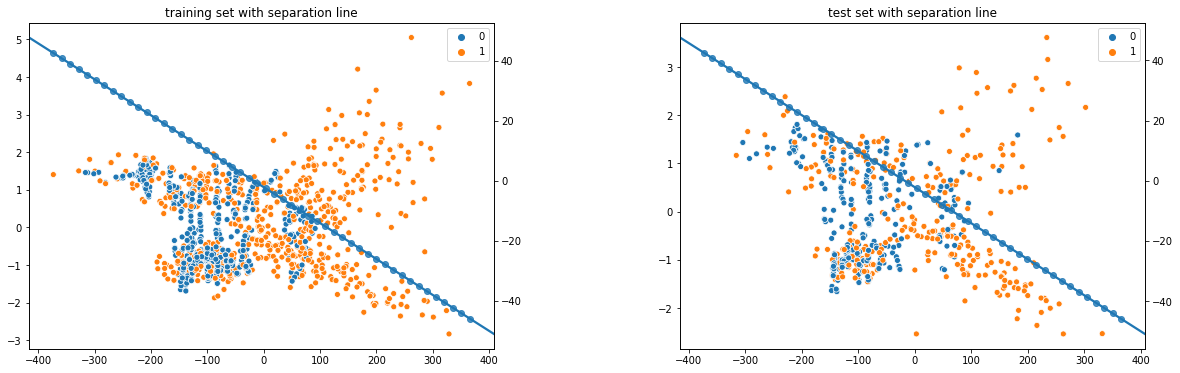

logit classification accuracy on training set: 0.73
logit classification accuracy on test set: 0.69
full classification report (on test set:)
              precision    recall  f1-score   support

           0       0.64      0.85      0.73       296
           1       0.78      0.53      0.63       302

    accuracy                           0.69       598
   macro avg       0.71      0.69      0.68       598
weighted avg       0.71      0.69      0.68       598

average precision score: 0.65
confusion matrix: 
 [[251  45]
 [141 161]]
tn: 251.00, fp: 45.000, fn: 141.00, tp: 161.00
using decision_function


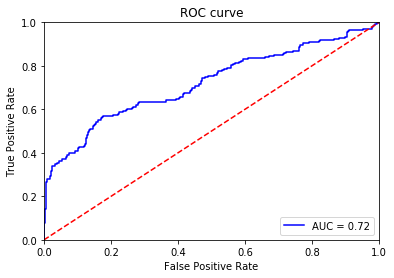

In [ ]:
clf, CL_pred_Train, CL_pred_Test = LinearSVM(XTrain, CLTrain, XTest, CLTest)

plotLinearFitTrainTest(clf, XTrain, CLTrain, XTest, CLTest)

evaluationReport(CLTrain, CL_pred_Train, CLTest, CL_pred_Test)

plotROC(clf, XTest, CLTest)

## Decision trees

logit classification accuracy on training set: 1.00
logit classification accuracy on test set: 0.75
full classification report (on test set:)
              precision    recall  f1-score   support

           0       0.75      0.74      0.75       296
           1       0.75      0.76      0.76       302

    accuracy                           0.75       598
   macro avg       0.75      0.75      0.75       598
weighted avg       0.75      0.75      0.75       598

average precision score: 0.69
confusion matrix: 
 [[218  78]
 [ 71 231]]
tn: 218.00, fp: 78.000, fn: 71.00, tp: 231.00


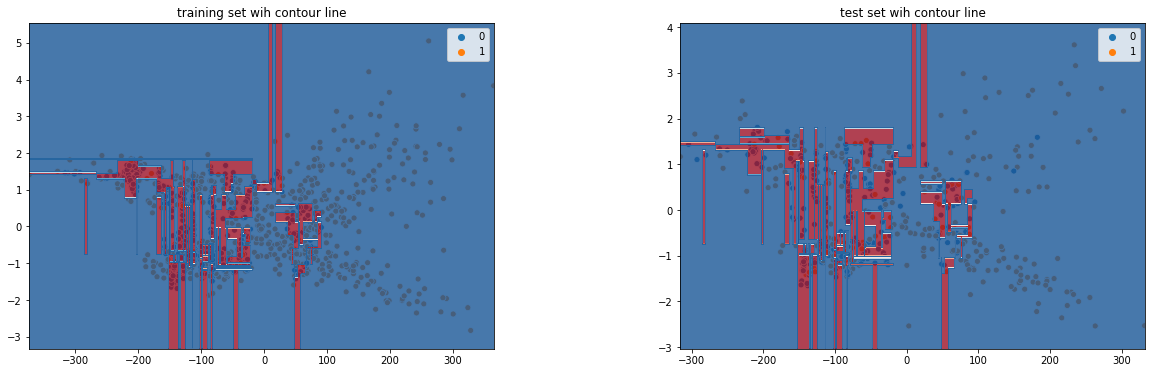

In [ ]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(XTrain, CLTrain)

# predictions on test set
CL_pred_Train = clf.predict(XTrain)
CL_pred_Test = clf.predict(XTest)

plotContourFitTrainTest(clf, XTrain, CLTrain, XTest, CLTest)

evaluationReport(CLTrain, CL_pred_Train, CLTest, CL_pred_Test)

dot = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot) 
# graph